## power transformer (box-cox and yeo-johnson transformation )

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [4]:
df=pd.read_csv('concrete_data.csv')

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
596,170.3,155.5,0.0,185.7,0.0,1026.6,724.3,7,10.73
906,266.0,112.0,87.0,178.0,10.0,910.0,745.0,28,39.42
107,323.7,282.8,0.0,183.8,10.3,942.7,659.9,7,49.80
513,424.0,22.0,132.0,168.0,8.9,822.0,750.0,7,40.29
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23


In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
X_train,X_test,y_train, y_test=train_test_split(df.drop(columns=['Strength'],axis=1),df['Strength'],test_size=0.2)

In [9]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
415,250.0,0.0,95.7,191.8,5.3,948.9,857.2,3
948,153.1,145.0,113.0,178.5,8.0,867.2,824.0,28
345,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,14
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3
851,160.0,188.0,146.0,203.0,11.0,829.0,710.0,28


## plots

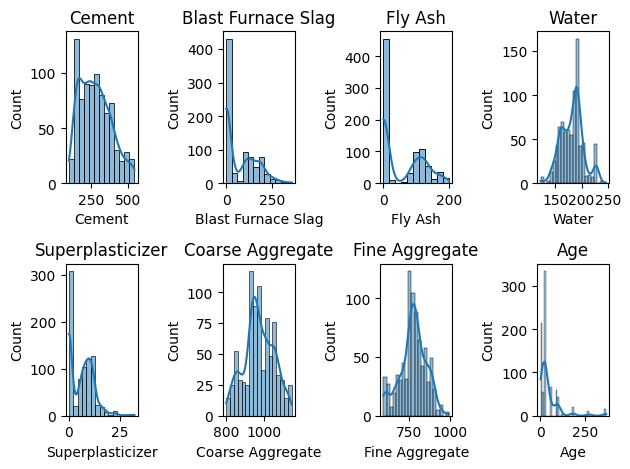

In [40]:
for i, col in enumerate(X_train.columns, 1):
  plt.subplot(2, 4, i)
  sns.histplot(X_train[col], kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()


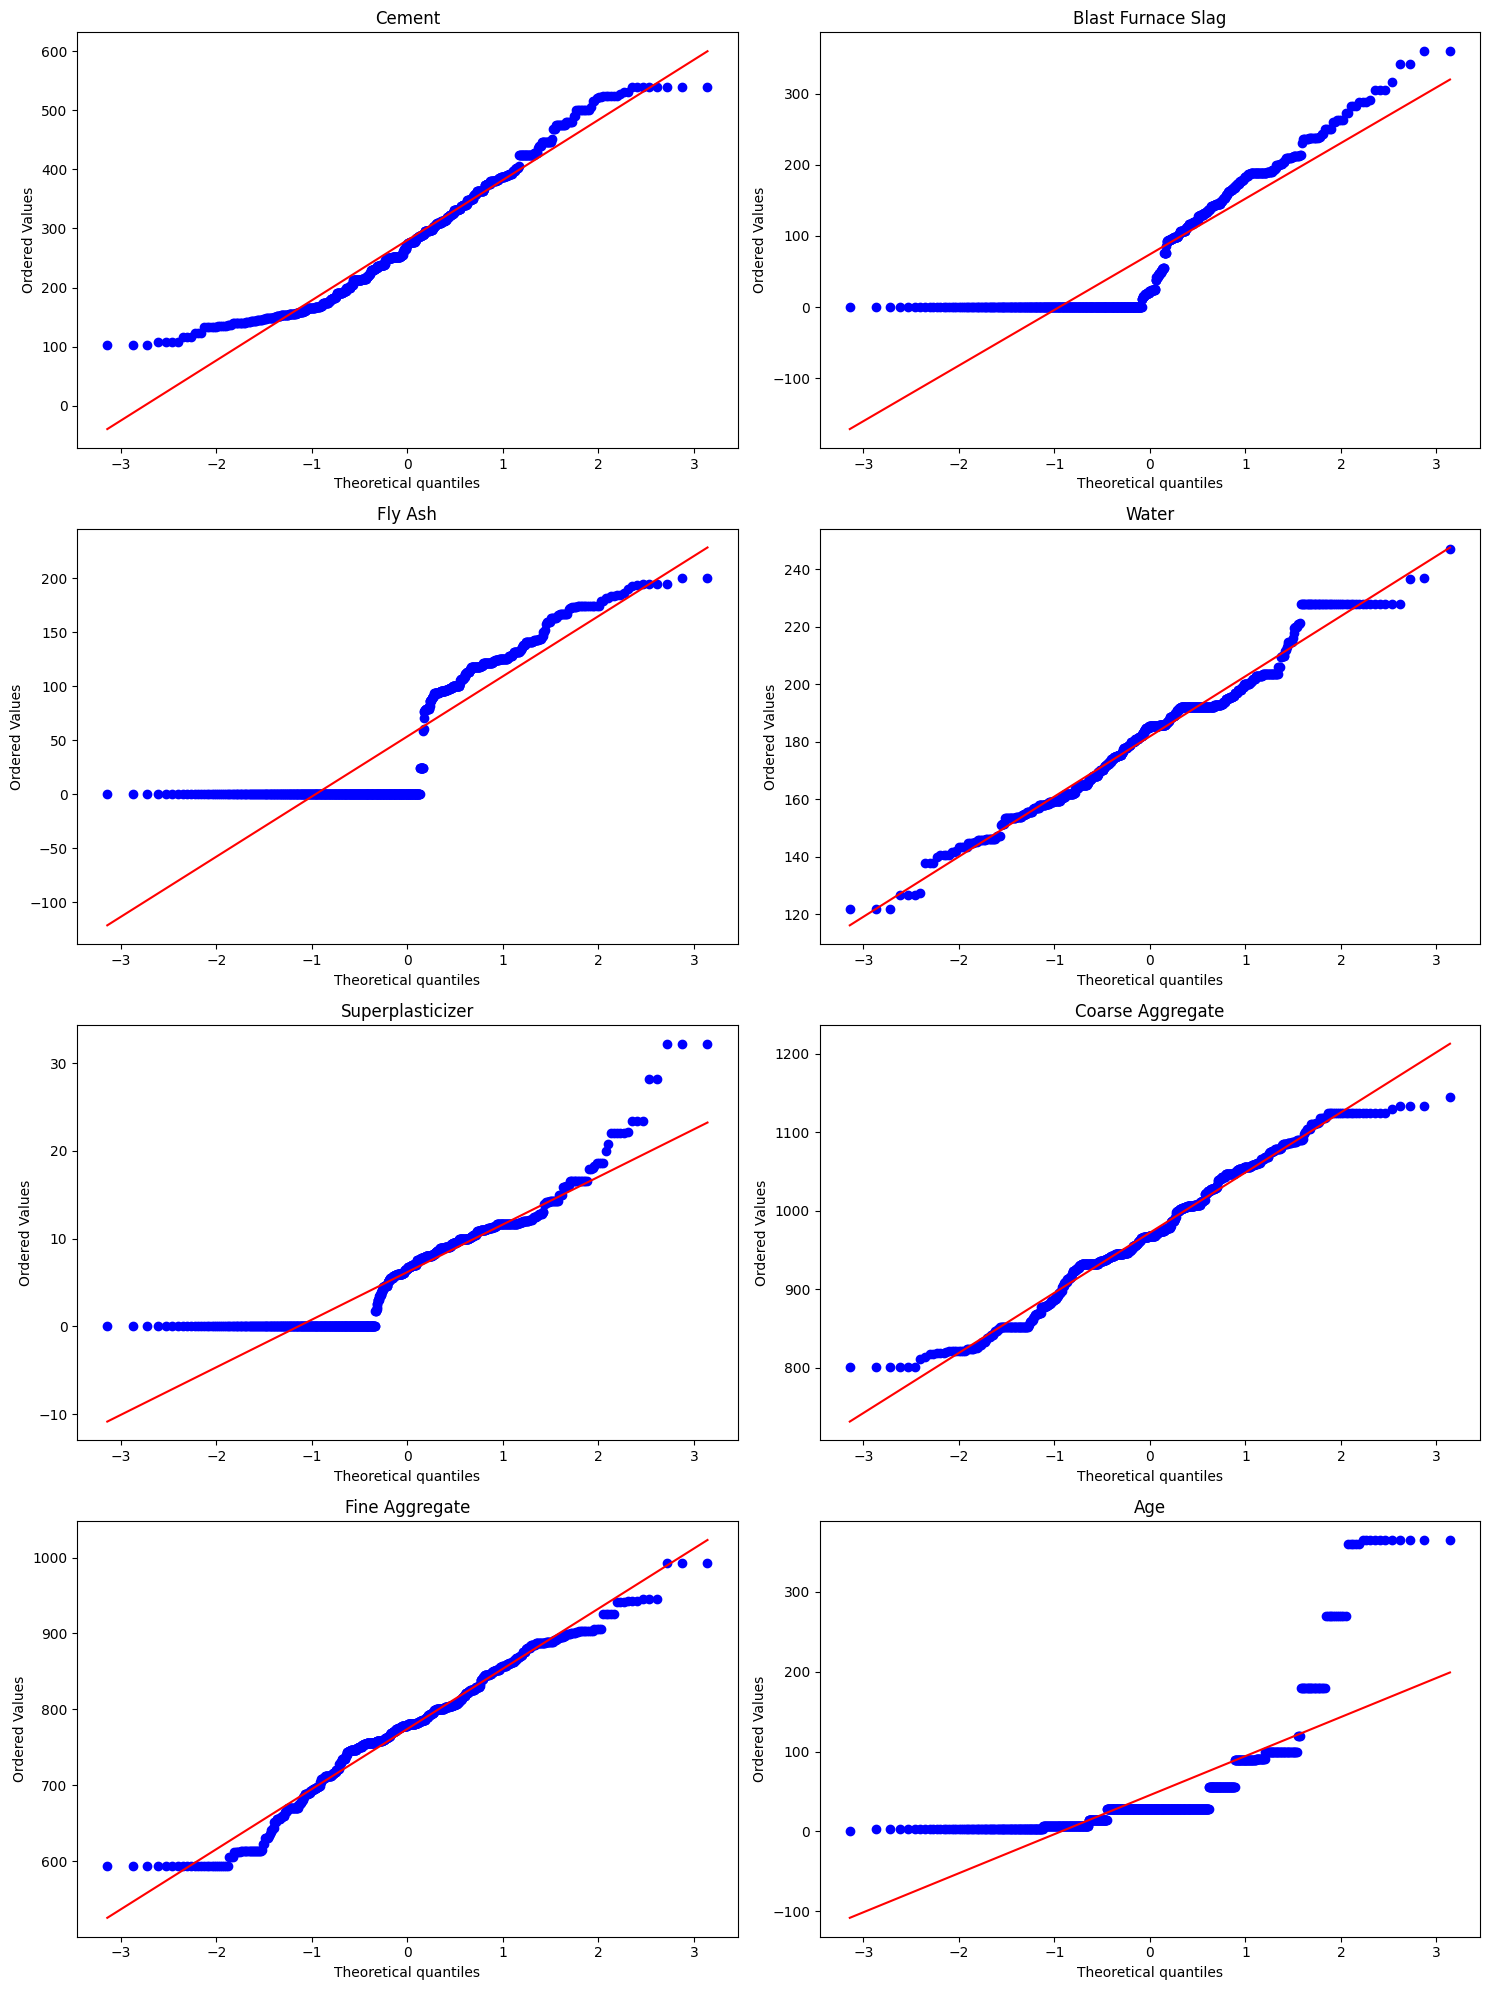

In [46]:
from scipy import stats
plt.figure(figsize=(15, 20))
for i, col in enumerate(X_train.columns,1):
    plt.subplot(4, 2, i)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(col)
plt.tight_layout()
plt.show()

## without any transformations

In [10]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.5672774700274037

## BOX - COX transformation 

In [51]:
trf=PowerTransformer(method='box-cox')
X_train_transformed=trf.fit_transform(X_train+0.00001)
X_test_transformed=trf.transform(X_test+0.00001)
lr1=LinearRegression()
lr1.fit(X_train_transformed,y_train)
y_pred_box=lr1.predict(X_test_transformed)
r2_score(y_test, y_pred_box)


0.7855378309956548

In [61]:
X_train_transformed=pd.DataFrame(X_train_transformed, columns=X_train.columns)

C:\Users\sanga\AppData\Local\Temp\ipykernel_8004\1243549281.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\sanga\AppData\Local\Temp\ipykernel_8004\1243549281.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])
C:\Users\sanga\AppData\Local\Tem

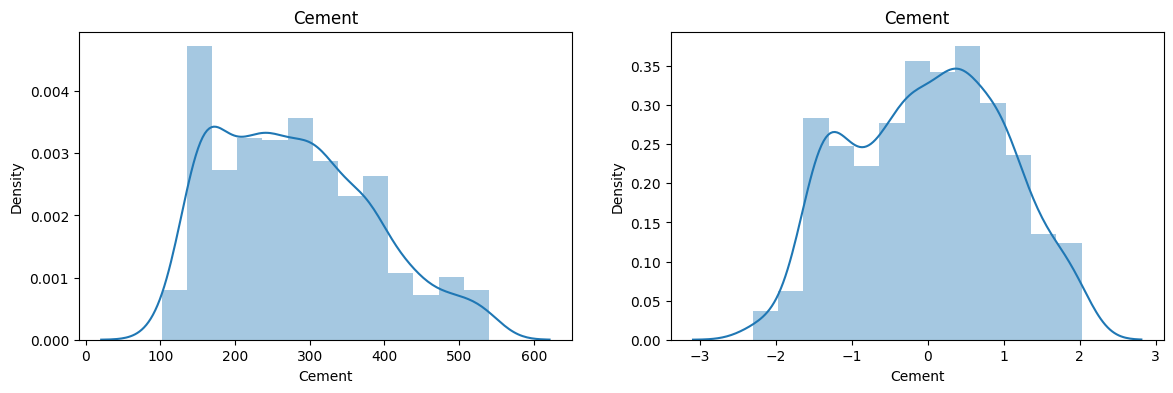

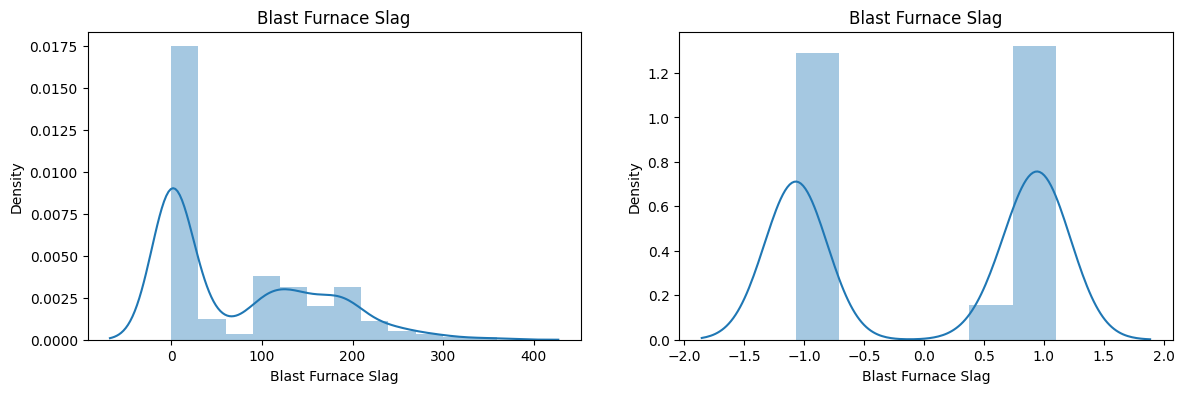

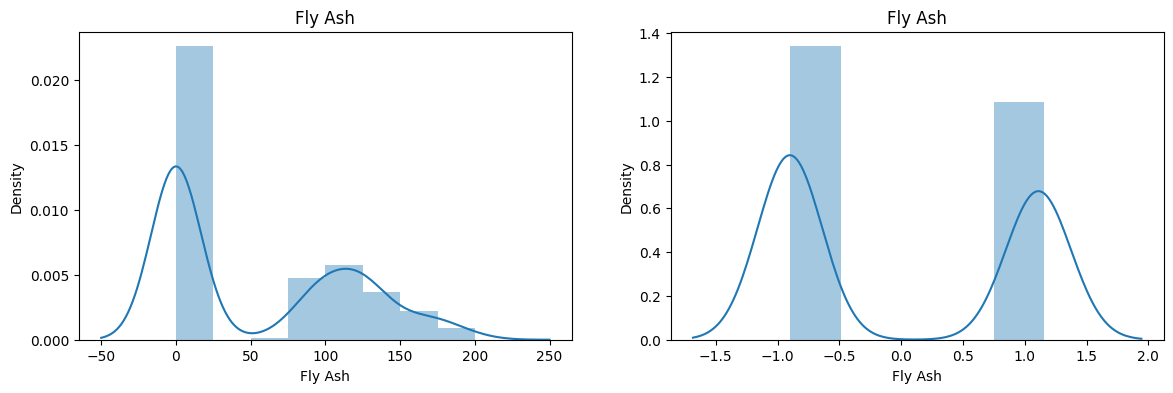

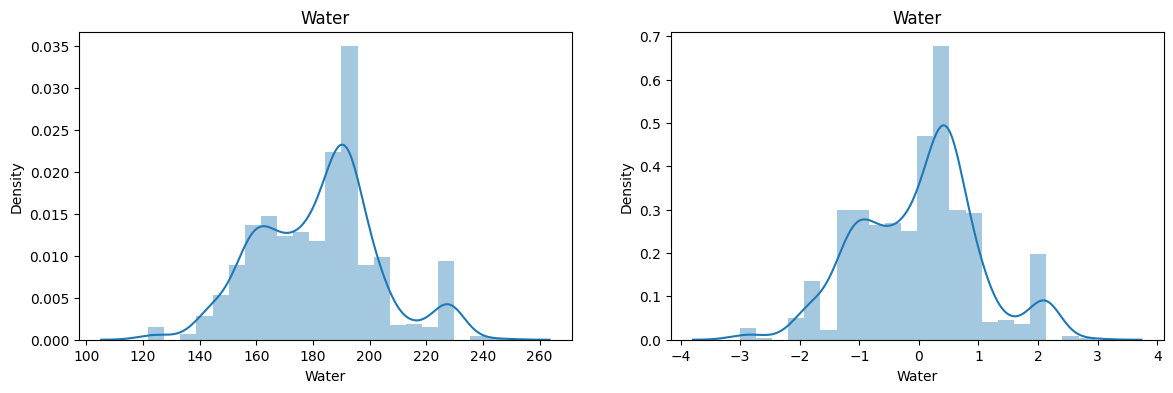

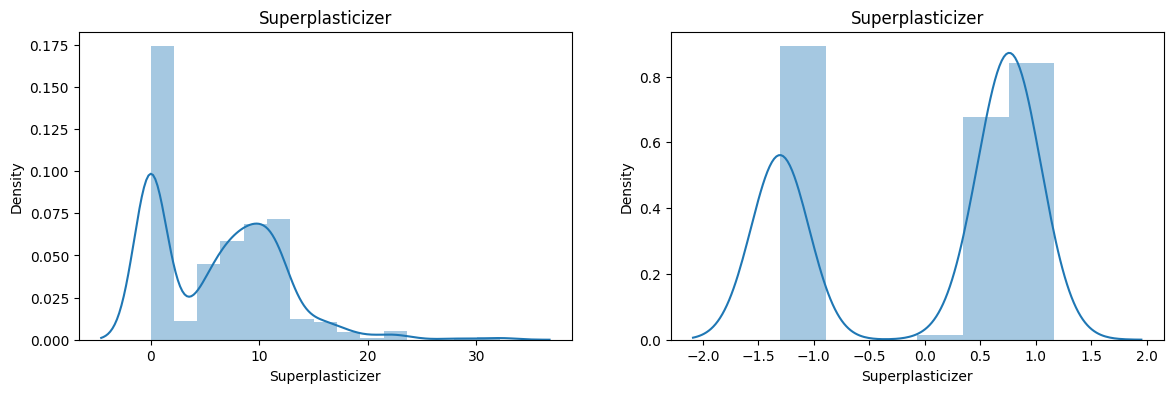

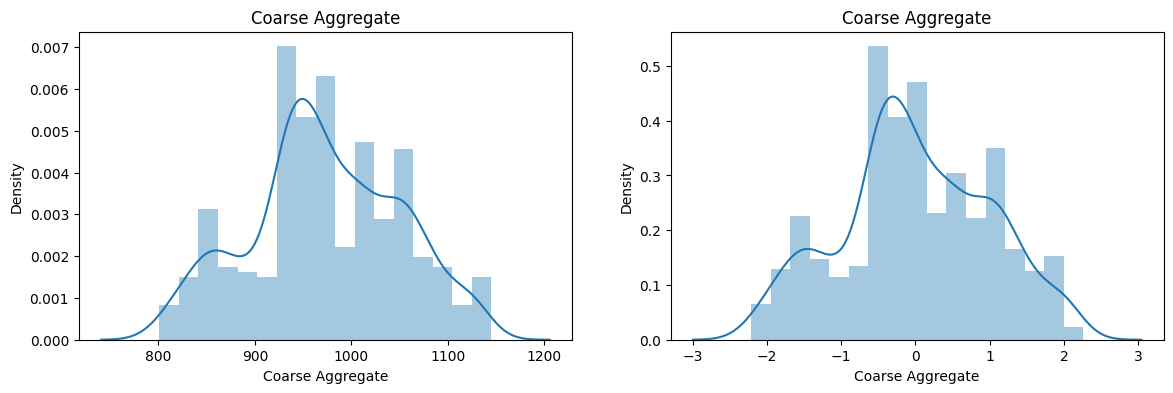

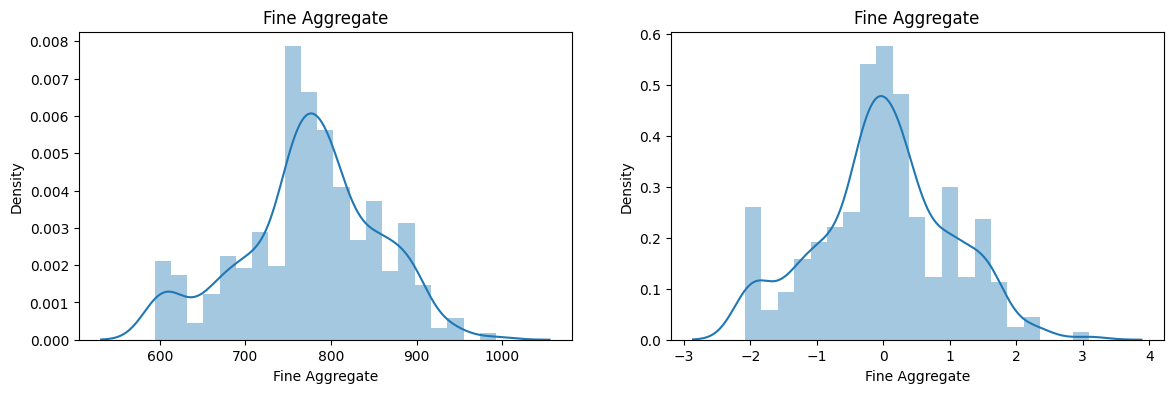

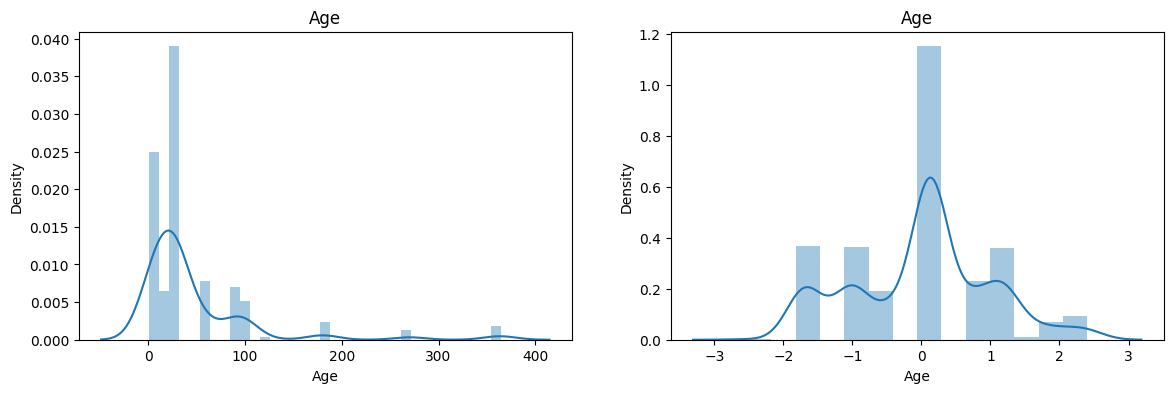

In [62]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(1,2,2)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

## Yeo -Johson Transformer 

In [53]:
trf1=PowerTransformer()
X_train_transformed1=trf1.fit_transform(X_train+0.00001)
X_test_transformed1=trf1.transform(X_test+0.00001)
lr2=LinearRegression()
lr2.fit(X_train_transformed1,y_train)
y_pred1=lr2.predict(X_test_transformed1)
r2_score(y_test, y_pred1)

0.7876391517442956